# Load your data in JAXspec

Most of the data you will use when manipulating X-ray spectra will be in the form of a PHA file. This file contains the measured spectra, the background spectra, and also links to the response matrix file and the ancillary response file. 

## Loading an instrumental setup

JAXspec provides a simple way to load this data using the `Observation.from_pha_file` function. If you only want to load the instrument related data (i.e. the response matrix and the ancillary response file), you can use the `Instrument.from_ogip_file` function.


In [1]:
from jaxspec.data import Instrument

instrument = Instrument.from_ogip_file("data/PN.arf", "data/PN.rmf")

Instrument and observation objects are subclasses of `xarray`'s datasets, which mean they can be interactively explored when using jupyter notebooks.

In [2]:
instrument

<xarray.Instrument>
Dimensions:         (instrument_channel: 4096, unfolded_channel: 2067)
Coordinates:
    e_min_unfolded  (unfolded_channel) float64 0.05 0.051 0.052 ... 15.98 15.99
    e_max_unfolded  (unfolded_channel) float64 0.051 0.052 0.053 ... 15.99 16.0
    e_min_channel   (instrument_channel) float64 0.0 0.00537 ... 20.47 20.48
    e_max_channel   (instrument_channel) float64 0.00537 0.01074 ... 20.48 20.48
Dimensions without coordinates: instrument_channel, unfolded_channel
Data variables:
    redistribution  (instrument_channel, unfolded_channel) float64 0.07458 .....
    area            (unfolded_channel) float64 1.239 4.504 9.953 ... 1.693 1.671
Attributes:
    description:  X-ray instrument response dataset

You can display insights about your instrumental setup with the following commands

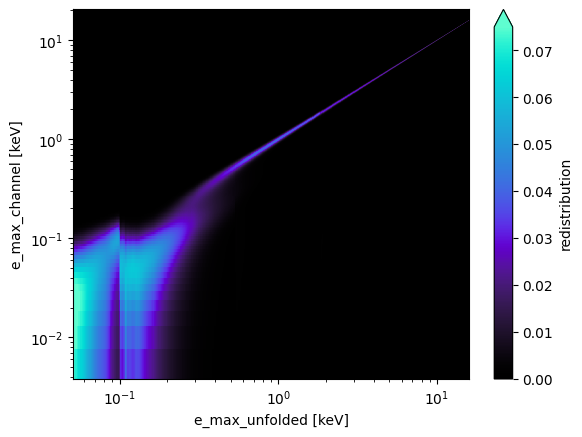

In [3]:
import matplotlib.pyplot as plt
instrument.plot_redistribution()
plt.show()

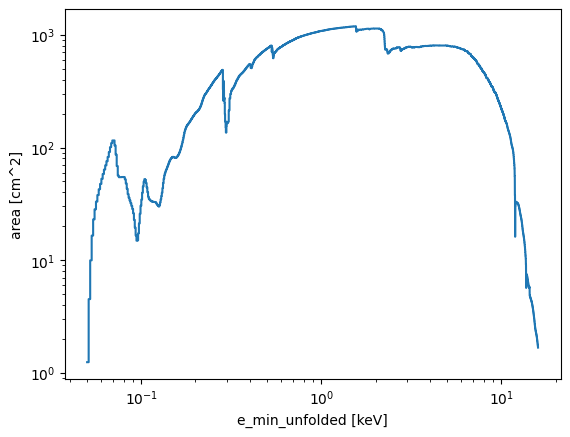

In [4]:
import matplotlib.pyplot as plt
instrument.plot_area()
plt.show()

## Loading a given observation

In [5]:
from jaxspec.data import Observation

observation = Observation.from_pha_file("data/PN_spectrum_grp20.fits")
observation

<xarray.Observation>
Dimensions:            (instrument_channel: 4096, folded_channel: 1230)
Coordinates:
    channel            (instrument_channel) int64 0 1 2 3 ... 4093 4094 4095
    grouped_channel    (folded_channel) int64 0 1 2 3 4 ... 1226 1227 1228 1229
Dimensions without coordinates: instrument_channel, folded_channel
Data variables:
    counts             (instrument_channel) int64 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    folded_counts      (folded_channel) int64 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    grouping           (folded_channel, instrument_channel) bool True ... True
    quality            (instrument_channel) int64 1 1 1 1 1 1 1 ... 1 1 1 1 1 1
    exposure           float64 2.027e+04
    background         (instrument_channel) int64 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    folded_background  (folded_channel) int64 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
Attributes:
    observation_file:         data/PN_spectrum_grp20.fits
    background_file:          data/PNbackground_spectrum.fits
    response_matrix_file:     data/PN.rmf
    ancillary_response_file:  data/PN.arf
    description:              X-ray observation dataset

You can highlight the grouping bound to your observation, and understand how you photon are packed into new bins.

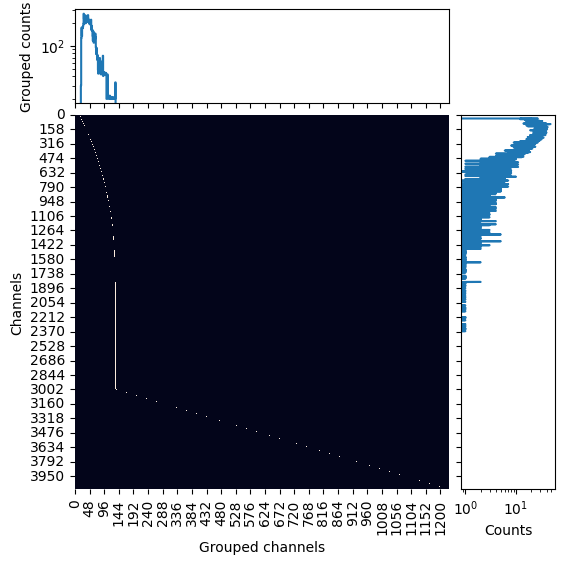

In [6]:
observation.plot_grouping()
plt.show()

## Define a folding matrix

The `FoldingMatrix` is the key component of a `jaxspec` inference problem. It will define a transfer matrix which carries the information about how your spectrum is folded through your instrument and binned with your observation. To build a folding matrix, you usually require an instrument and an observation, and add the energy band you consider.

In [7]:
from jaxspec.data import FoldingMatrix

folding_model = FoldingMatrix.from_instrument(instrument, observation, low_energy=0.5, high_energy=8)

You can also directly load it from a .pha file

In [8]:
folding_model = FoldingMatrix.from_pha_file('data/PN_spectrum_grp20.fits', low_energy=0.5, high_energy=8)
folding_model

<xarray.FoldingMatrix>
Dimensions:            (folded_channel: 102, unfolded_channel: 2067)
Coordinates:
    grouped_channel    (folded_channel) int64 29 30 31 32 33 ... 127 128 129 130
    e_min_unfolded     (unfolded_channel) float64 0.05 0.051 ... 15.98 15.99
    e_max_unfolded     (unfolded_channel) float64 0.051 0.052 ... 15.99 16.0
    e_min_folded       (folded_channel) float64 0.5215 0.5572 ... 7.065 7.365
    e_max_folded       (folded_channel) float64 0.5572 0.5926 ... 7.365 7.795
Dimensions without coordinates: folded_channel, unfolded_channel
Data variables:
    transfer_matrix    (folded_channel, unfolded_channel) float64 0.0 ... 0.0
    area               (unfolded_channel) float64 1.239 4.504 ... 1.693 1.671
    exposure           float64 2.027e+04
    folded_counts      (folded_channel) float64 265.0 227.0 196.0 ... 20.0 20.0
    folded_background  (folded_channel) float64 23.0 27.0 22.0 ... 13.0 21.0